<a href="https://colab.research.google.com/github/sofia604/DEA113/blob/main/Kaggle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import userdata
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

### Import dataset from Kaggle

In [12]:
!kaggle datasets download -d ankushpanday1/brain-tumor-prediction-dataset
!unzip brain-tumor-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/ankushpanday1/brain-tumor-prediction-dataset
License(s): MIT
  0% 0.00/5.00M [00:00<?, ?B/s]
100% 5.00M/5.00M [00:00<00:00, 120MB/s]
Archive:  brain-tumor-prediction-dataset.zip
  inflating: Brain_Tumor_Prediction_Dataset.csv  


In [14]:
df = pd.read_csv('/content/Brain_Tumor_Prediction_Dataset.csv')
df.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No


### Data review

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Blood_Pressure       250000 non-null  object 
 13  Diabetes             250000 non-null  object 
 14  Tumor_Type           250000 non-null  object 
 15  Treatment_Receive

In [16]:
#Summary statistics:
df.describe()

,Age,Tumor_Size,Genetic_Risk,Survival_Rate(%)
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,46.962424,5.251768,49.998916,54.481532
std,24.517143,2.742576,29.178031,25.999932
min,5.000000,0.500000,0.000000,10.000000
25%,26.000000,2.870000,25.000000,32.000000
50%,47.000000,5.260000,50.000000,55.000000
75%,68.000000,7.630000,75.000000,77.000000
max,89.000000,10.000000,100.000000,99.000000


### Handling Missing data

In [19]:
#Check for missing values
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Tumor_Size,0
Tumor_Location,0
MRI_Findings,0
Genetic_Risk,0
Smoking_History,0
Alcohol_Consumption,0
Radiation_Exposure,0


In [20]:
#Fill lissing values in "Treatment_Received"
df['Treatment_Received'].fillna(df['Treatment_Received'].mode()[0], inplace=True)

<ipython-input-20-b33c33dbe768>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Treatment_Received'].fillna(df['Treatment_Received'].mode()[0], inplace=True)


In [21]:
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Tumor_Size,0
Tumor_Location,0
MRI_Findings,0
Genetic_Risk,0
Smoking_History,0
Alcohol_Consumption,0
Radiation_Exposure,0


### Create new variables

In [39]:
# Assigning numerical values to Tumor Growth Rate categories
tumor_growth_mapping = {
    "Slow": 1,
    "Moderate": 2,
    "Fast": 3
}
df['Tumor_Growth_Rate_Num'] = df['Tumor_Growth_Rate'].map(tumor_growth_mapping)
df['Tumor_Severity_Score'] = df['Tumor_Size'] * df['Tumor_Growth_Rate_Num']

### Variable Analysis

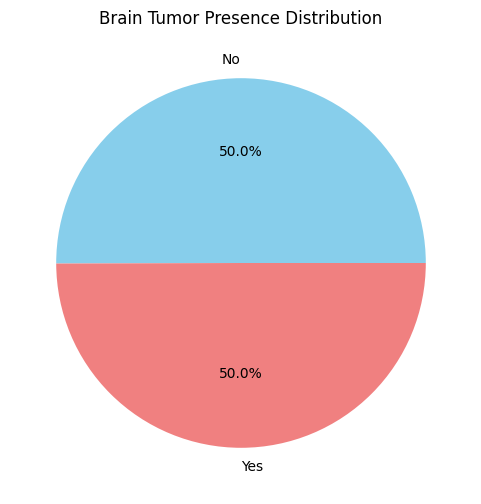

In [30]:
#Brain Tumor Presence
plt.figure(figsize=(6,6))
df['Brain_Tumor_Present'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Brain Tumor Presence Distribution")
plt.ylabel("")
plt.show()

<ipython-input-33-15f294a79026>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Tumor_Type'], order=df['Tumor_Type'].value_counts().index, palette="viridis")


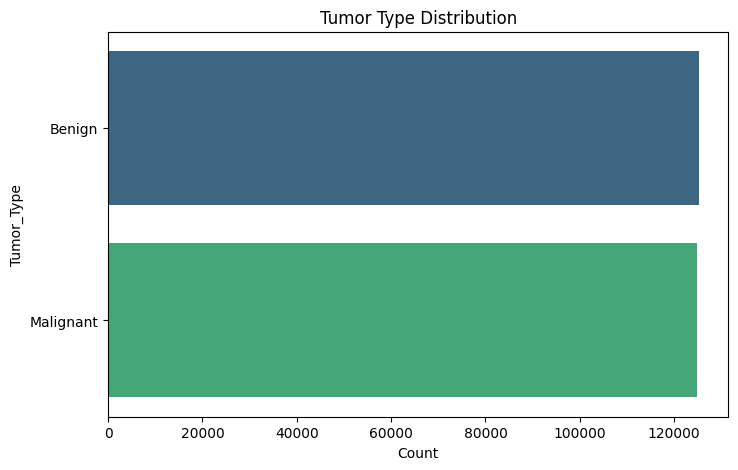

In [33]:
# Tumor Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(y=df['Tumor_Type'], order=df['Tumor_Type'].value_counts().index, palette="viridis")
plt.title("Tumor Type Distribution")
plt.xlabel("Count")
plt.show()

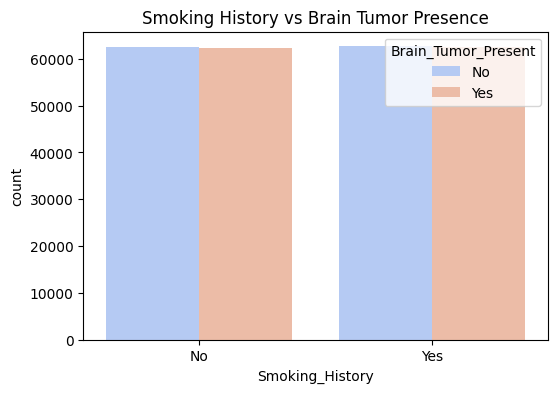

In [34]:
# Smoking History Impact ---
plt.figure(figsize=(6,4))
sns.countplot(x=df['Smoking_History'], hue=df['Brain_Tumor_Present'], palette="coolwarm")
plt.title("Smoking History vs Brain Tumor Presence")
plt.show()

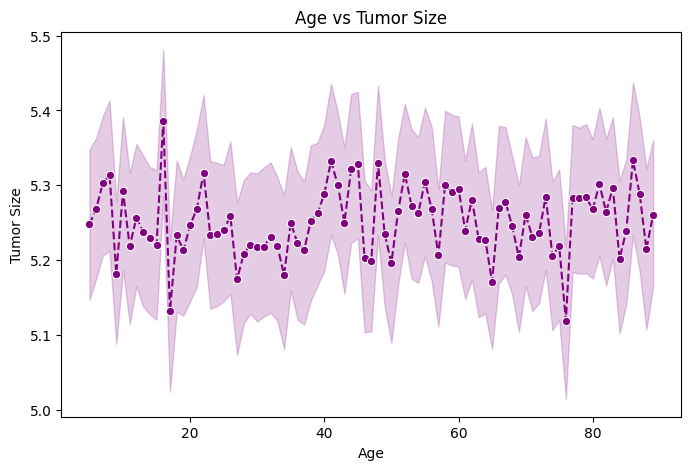

In [35]:
# Age vs Tumor Size
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Age'], y=df['Tumor_Size'], marker='o', linestyle='dashed', color='purple')
plt.title("Age vs Tumor Size")
plt.xlabel("Age")
plt.ylabel("Tumor Size")
plt.show()

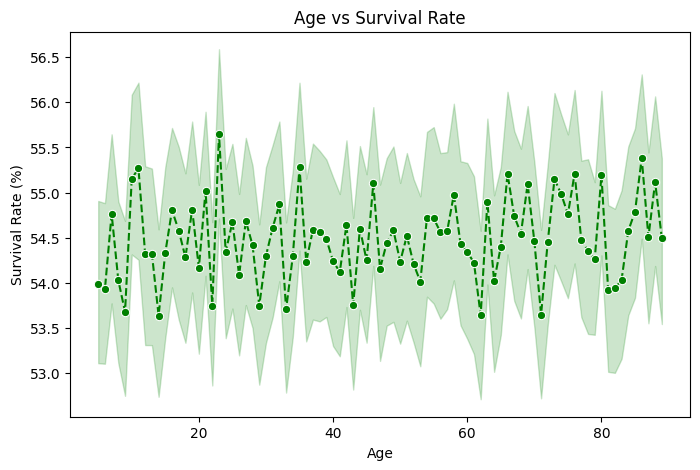

In [36]:
# Age vs Survival Rate
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Age'], y=df['Survival_Rate(%)'], marker='o', linestyle='dashed', color='green')
plt.title("Age vs Survival Rate")
plt.xlabel("Age")
plt.ylabel("Survival Rate (%)")
plt.show()

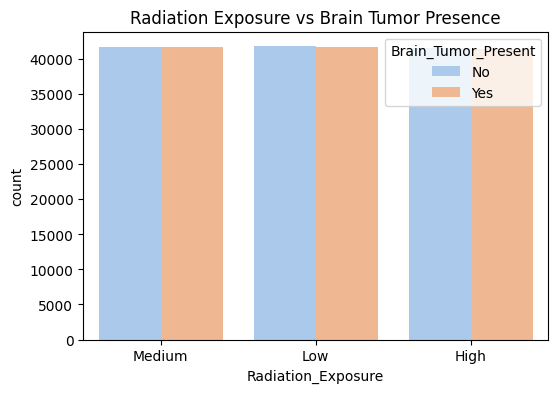

In [37]:
#Radiation Exposure Impact
plt.figure(figsize=(6,4))
sns.countplot(x=df['Radiation_Exposure'], hue=df['Brain_Tumor_Present'], palette="pastel")
plt.title("Radiation Exposure vs Brain Tumor Presence")
plt.show()

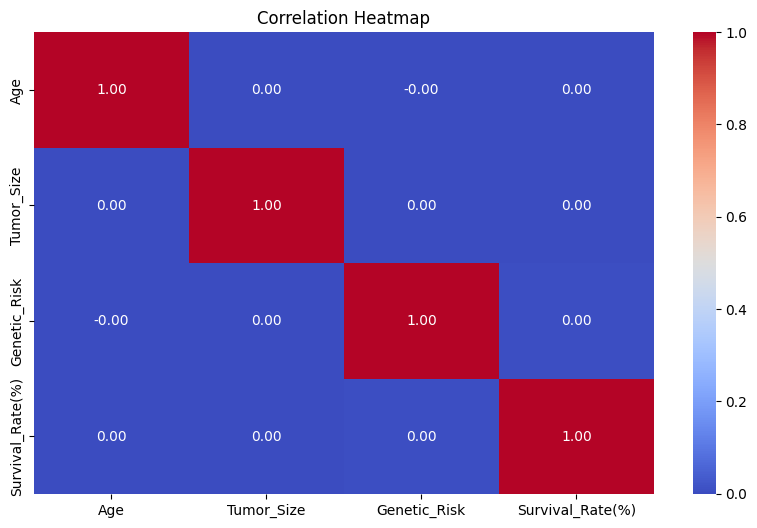

In [23]:
# Correlation Heatmap (Numerical features)
numerical_cols = ['Age', 'Tumor_Size', 'Genetic_Risk', 'Survival_Rate(%)']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-27-1b3a665c9aef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Tumor_Type'], y=df['Survival_Rate(%)'], palette="pastel")


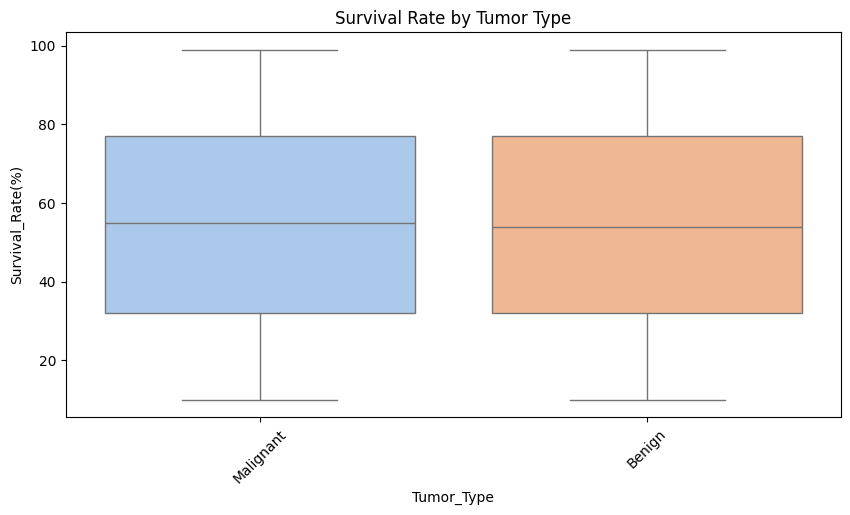

In [27]:
# Survival Rate distribution by Tumor Type
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Tumor_Type'], y=df['Survival_Rate(%)'], palette="pastel")
plt.xticks(rotation=45)
plt.title("Survival Rate by Tumor Type")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


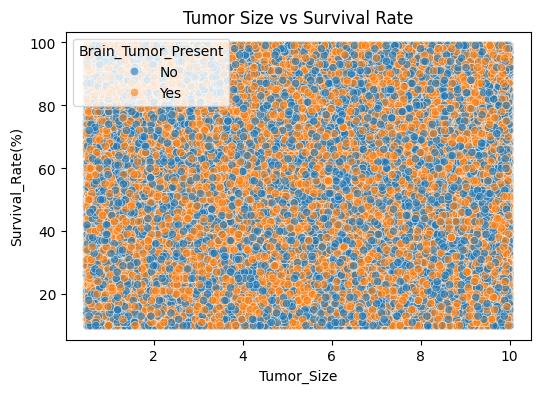

In [29]:
# Tumor Size vs Survival Rate
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Tumor_Size'], y=df['Survival_Rate(%)'], hue=df['Brain_Tumor_Present'],alpha=0.6)
plt.title("Tumor Size vs Survival Rate")
plt.show()
